# Monte Carlo Methods

### Last Class
- Monte Carlo Introduction

### Goals for Today
- Define kernel density
- Implement a kernel density function to appoximate a probability distribution
- Discuss the advantages and disadvantages of various kernels
- Apply a kernel density function to a mathematical model

### Pre-Lecture Activities

-- [MATH 360 > Kernel Density](http://ubcmath.github.io/MATH360/)

### Kernel Density Overview

#### Preliminaries
When working with probabilistic models, often what we are looking for is the probability distribution of our system. As we have seen, probability distributions give us a lot of information about the system, but are often difficult to obtain.  Monte Carlo gives us a way to simulate a scenario multiple times in order to produce a probability distribution that is a *sample* of the actual probability distribution.  The more Monte Carlo simulations we run, the closer we are able to approximate the unknown probability distribution.  In some cases, we may be able to use a known probability distribution (e.g., uniform, normal, exponential) to "fit" our simulated probability distribution, but in many cases, the obtained distribution may not resemble any of the known probability density functions. 

In our previous classes, we have utilized a histogram to visualize the probability distribution of data.  However, this can also come with drawbacks: often the width and the number of bins, as well as the initial starting point, can influence the how the probability distribution looks and may skew how we interprete the data.  

**Remark:** by "binning" our data to produce a histogram, we also lose some information about the individual data points. 

This is where the **kernel density function** comes in.  A kernel density function will produce a continuous, smooth curve approximation to the probability density function based off of each individual data point. 

#### Definition
Let $x_1,x_2, x_3, \dots, x_n$ be a sample of $n$ observations that are indepenedent and identically distributed from a population $X$ with unknown probability distribution funciton $f(x)$. The **kernel density function** is given by
\begin{align*}
\hat{f}_h(x) &= \frac{1}{n} \sum \limits_{i=1}^{n} K_h\left( x - x_i \right)\\
& = \frac{1}{nh} \sum \limits_{i=1}^{n} K_h\left( \frac{x - x_i}{h} \right),
\end{align*}
where $K$ is the kernel and $h>0$ is the bandwidth. 

Notes:
1. The Kernel function $K$ is non-negative and bounded for all $x$: i.e., $0 \leq K < \infty.$
2. It is normalized to unity: $\int\limits_{-\infty}^{\infty} K(x-x_i) \, dx =1.$  The form given in the definition is already normalized (and hence the division by $n$ and $nh$).  As an exercise, try checking the normalization. 

**Remark:** In the literature, you may see Kernel Density Estimator to refer to the functional form in the definition. In statistics, *Estimator* is used to refer to a quantity or rule that is used to estimate the true value of an object we are interested in.  Here, we will be *estimating* the actual probability density function by constructing a kernel density function.  

### Kernel Functions
So what is $K$? We can think of the kernel function as our building block for the kernel density function. Each data point will be fed into the kernel function and used to "build" our probability density function. The kernel function $K$ tells us what these blocks look like. 

In most applications, a symmetric kernel about the data point $x_i$ is utilized, but asymetric kernels are possible.  Some common symmetric kernels:

1. Triangular: $K(x)=
\begin{cases}
1-|x|, |x|<1,\\
0, x \geq 1.
\end{cases}$
2. Rectangular: $K(x)=
\begin{cases}
1/2, |x|<1,\\
0, x \geq 1.
\end{cases}$
3. Gaussian: $K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}.$ 

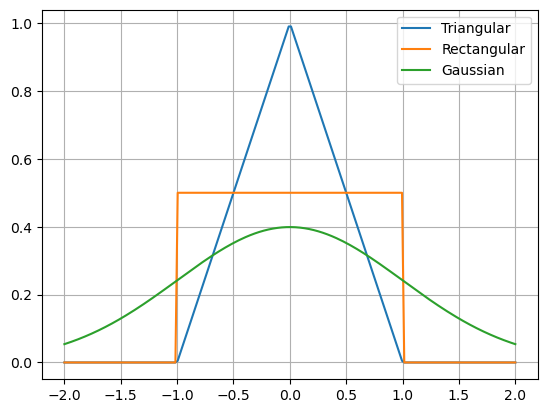

In [2]:
x = np.linspace(-2,2,200)

K1 = np.piecewise(x, [((x < 1) & (x>-1)),((x<=-1) & (x>=1))], [lambda x: 1-np.abs(x), lambda x: 0])
K2 = np.piecewise(x, [((x < 1) & (x>-1)),((x<=-1) & (x>=1))], [lambda x: 1/2, lambda x: 0])
K3 = 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)


plt.plot(x,K1,label = 'Triangular')
plt.plot(x,K2,label = 'Rectangular')
plt.plot(x,K3,label = 'Gaussian')
plt.legend()
plt.grid()
plt.show()

In the plot, we have centered the kernel function around $0$, however, when writing $K(x-x_i)$, we are indicating that the centre will be at data point $x_i$.  Recall that adding or subtracting *on the inside* of a function corresponds to a shift left or right in the graph of said function.

**Bandwith:** controls the amount of "smoothing".  This is also sometimes called the smoothing parameter or window width.  By introducing $h$ into the kernel function, we are able to widen or shrink the width of the kernel function. The larger $h$ is, the wider the kernel function.

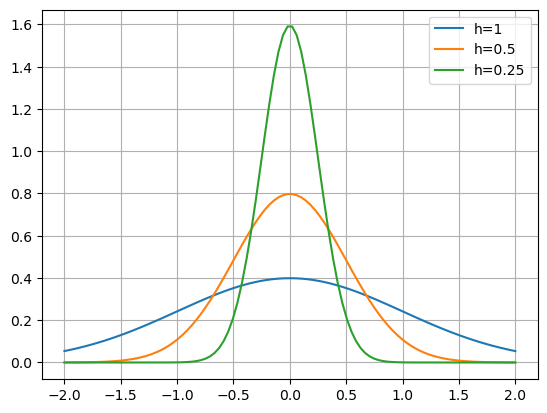

In [7]:
plt.plot(x,1/(np.sqrt(2*np.pi)*(1))*np.exp(-(x/(1))**2/2),label = 'h=1')
plt.plot(x,1/(np.sqrt(2*np.pi)*(0.5))*np.exp(-(x/(0.5))**2/2),label = 'h=0.5')
plt.plot(x,1/(np.sqrt(2*np.pi)*(0.25))*np.exp(-(x/(0.25))**2/2),label = 'h=0.25')
plt.legend()
plt.grid()
plt.show()

**Remark:** When choosing the bandwidth $h$, we want to find a balance between sensitivity to insignificant details with a small $h$ and oversmoothing with a large $h$.  In the case of the latter, too large of an $h$ can hide important details needed for our analysis, so carefully choosing the bandwidth is important.  Our goal for Kernel density is to obtain a good approximation to our probability density function, and $h$ can help us tune our result. 

Note: There are ways to determine the optimal value of $h$ given the data, but this is outside the scope of Math 360.  

#### Putting It Together
Once we have chosen a kernal function $K$, we apply it to every data point to garner a function $K(x)$.  This function is an **estimate** of the actual probability density function we are after.  If we have enough samples, this estimate will be sufficient for us to make predictions and gain insight into our modelling problem. 

### Check Your Understanding
1. For probabilistic models, why are we after the probability density function?
2. Why is it important for the kernel function $K$ to be normalized?
3. Does the choice of kernel function $K$ matter? I.e., would we get a different result if we chose a Triangular kernel vs a Gaussian kernel?  Is this dependent on the volume of data we have?
4. Why might a symmetrical kernel be prefered over an asymmetric kernel?

### Tasks 
1. Take two data points $x_1=0.25$ and $x_2=0.75$, which are independently and identically distributed. Write out the resulting Kernel Density function using the definition for a Triangular kernel and a Gaussian kernel.  Compare and contrast the resulting Kernel Density functions.  It may help to graph the result.
2. We noted above that the bandwidth $h$ allows us to change the width of the Kernel function, but is a tuning parameter.  Why might we want to include such a tuning parameter for modelling purposes?

**End of Pre-lecture Activities**

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
%matplotlib inline


print("packages imported")

packages imported


### Relation to Histograms

Let's first look at how Kernel density and histograms are related.  
1. Plot a histogram for the data: $[-1.5, -1.2, -0.8, -0.3, 0.4, 0.9].$
2. Use a Gaussian Kernel to form a kernel density for the data points.  Plot the function on the same plot as the data. How does the function "change" when it is near each data point?

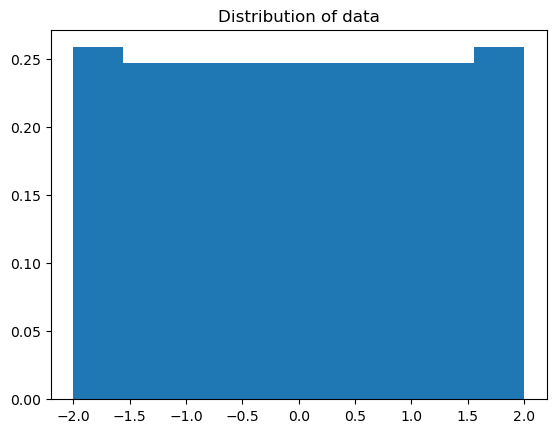

In [4]:
#Let's first look at how Kernel density and histograms are related

#create some data
X = np.array([-1.5, -1.2, -0.8, -0.3, 0.4, 0.9])

#plot the histogram
plt.hist(x, bins = 'auto',density = True)
plt.title('Distribution of data')
plt.show()

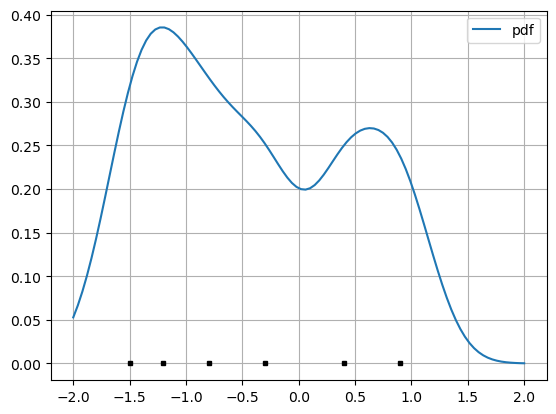

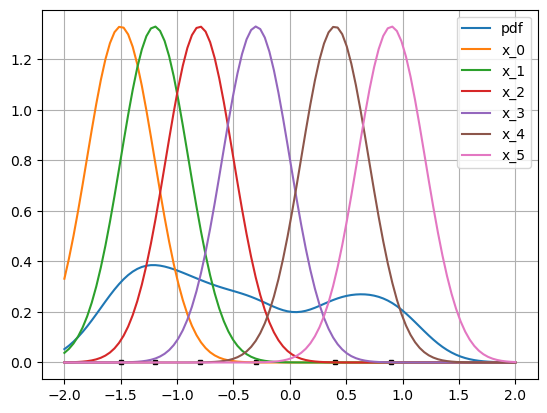

In [70]:
# Create a kernel density for each x_i

x = np.linspace(-2,2,100)

def K(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-(x)**2/2)

R = len(X)
h = 0.3
Kernel_fun = 0
for i in range(R):
    Kernel_fun += K((x-X[i])/h)



plt.plot(X, np.zeros_like(X), 's', markersize=3, color='black')
plt.plot(x, 1/((R+1)*h)*Kernel_fun,label = 'pdf')
plt.legend()
plt.grid()
plt.show()


plt.plot(X, np.zeros_like(X), 's', markersize=3, color='black')
plt.plot(x, 1/((R+1)*h)*Kernel_fun,label = 'pdf')
plt.plot(x, 1/h*K((x-X[0])/h),label = 'x_0')
plt.plot(x, 1/h*K((x-X[1])/h),label = 'x_1')
plt.plot(x, 1/h*K((x-X[2])/h),label = 'x_2')
plt.plot(x, 1/h*K((x-X[3])/h),label = 'x_3')
plt.plot(x, 1/h*K((x-X[4])/h),label = 'x_4')
plt.plot(x, 1/h*K((x-X[5])/h),label = 'x_5')
plt.legend()
plt.grid()
plt.show()

In [76]:
#check normalization

x = np.linspace(-10,10,100)

from scipy import integrate
prob = integrate.cumtrapz(1/h*K((x-X[0])/h), x, initial=0)

## print last value to see if normalized
prob[-1]

1.0

### Transit Travel Time 3

Let's suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Find the kernel density function using a Gaussian kernel, and then use the function to determine the probability that the time to reach campus is less than 30 minutes.

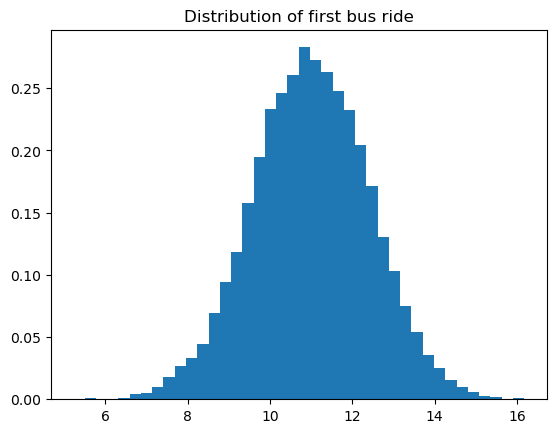

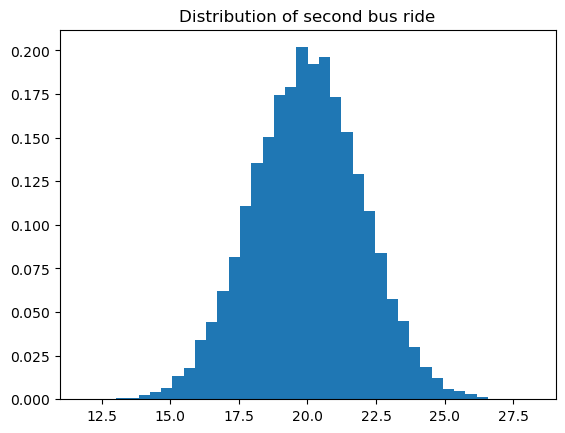

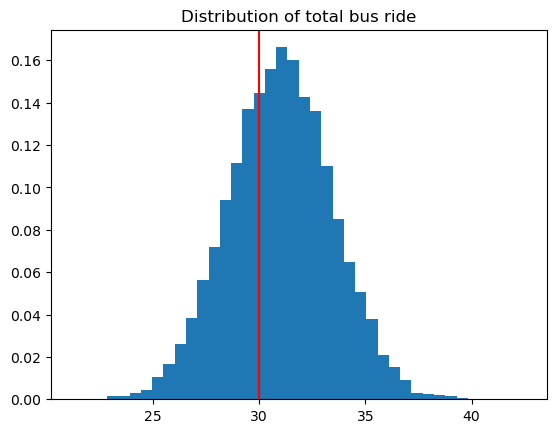

In [19]:
#number of Monte Carlo simulations
N = 20000 

#bus distributions
X1 = np.random.normal(loc=11, scale=np.sqrt(2), size=N)
X2 = np.random.normal(loc=20, scale=np.sqrt(4), size=N)

# total bus time
Y = X1 + X2

plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of first bus ride')
plt.show()

plt.hist(X2, bins = 40,density=True)
plt.title('Distribution of second bus ride')
plt.show()

plt.hist(Y,bins = 40, density = True) 
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.show()

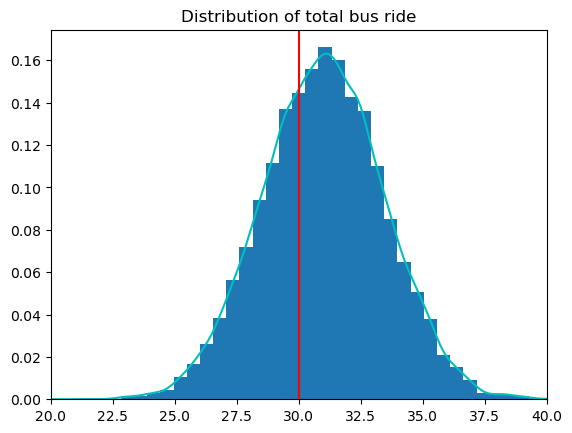

In [53]:
# Create a kernel density for each x_i

x = np.linspace(0,40,300)


def K(y):
    return 1/(np.sqrt(2*np.pi))*np.exp(-(y)**2/2)

R = len(Y)
h = 0.3
Kernel_fun = 0
for i in range(R):
    Kernel_fun += K((x-Y[i])/h)


plt.hist(Y,bins = 40, density = True) 
plt.plot(x,1/((R+1)*h)*Kernel_fun,color = 'c')
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.xlim([20,40])
plt.show()

In [54]:
#calculate probability
prob = integrate.cumtrapz(1/((R+1)*h)*Kernel_fun, x, initial=0)

index =  np.array(np.where(x <= 30))

print((prob[index.max()])*100,"%")

33.897994831409214 %


Last class, we calculated this probability using the bins generated by the histogram and had an answer of ~$34.465\%.$  Our answer here from the kernel function is roughly the same, but a little less than the result calculated from the histogram. If we make $h$ bigger, we might notice that the estimated probability does increase, and similarly, if we make $h$ smaller, the estimated probability decreases. 

### Transit Travel Time 4

In groups of 3-4, reconsider the following scenario. 

Let's again suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Between getting off of the first bus and getting on the second bus, we have to wait an average of 5 minutes.  Assume that the wait time is exponentially distributed.  

Find the kernel density function using a Gaussian kernel, a Triangular kernel, and a Rectangular kernel, and then use the functions to determine the probability that the time to reach campus is less than 30 minutes.  What differences do you observe when a different kernel function is chosen? Use $h=0.3$ as the bandwidth for both kernels.

Discuss the advantages and disadvantages to each of the kernel functions.

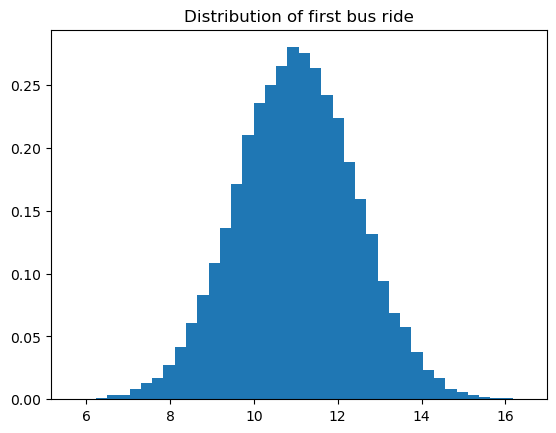

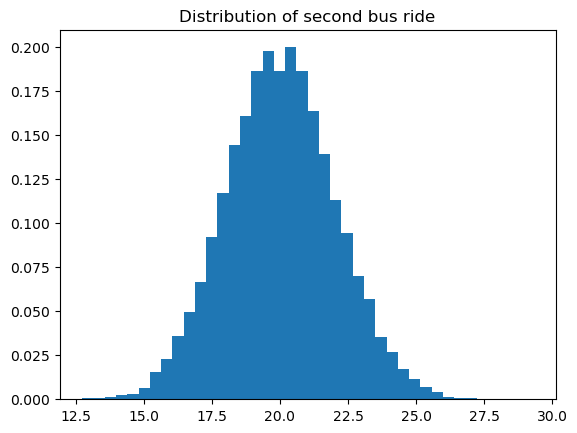

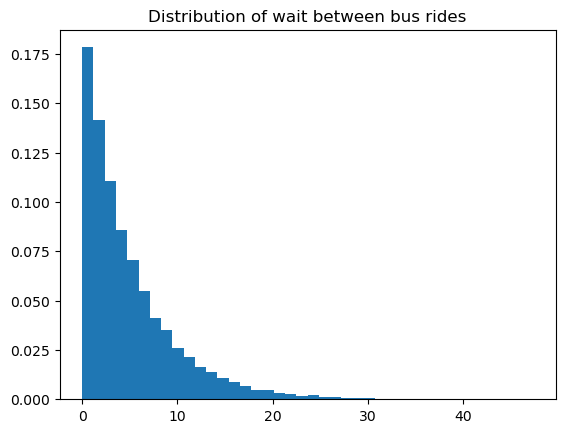

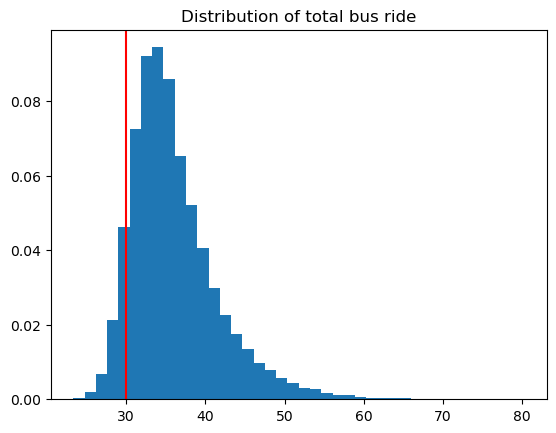

8.55 %


In [55]:
#number of Monte Carlo simulations
N = 20000 

#bus distributions
X1 = np.random.normal(loc=11, scale=np.sqrt(2), size=N)
X2 = np.random.normal(loc=20, scale=np.sqrt(4), size=N)
X3 = np.random.exponential(scale=5 ,size=N)

# total bus time
Y = X1 + X2 + X3

plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of first bus ride')
plt.show()

plt.hist(X2, bins = 40,density=True)
plt.title('Distribution of second bus ride')
plt.show()

plt.hist(X3, bins = 40,density=True)
plt.title('Distribution of wait between bus rides')
plt.show()

plt.hist(Y,bins = 40, density = True) 
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.show()

# calculation of probability that bus trip is less than 30 minutes

prob = np.sum(Y < 30)/len(Y)*100
print(prob, "%")

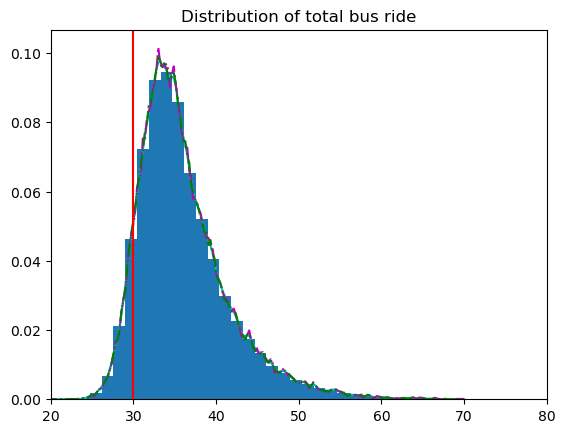

In [61]:
# Create a kernel density for each x_i

x = np.linspace(0,70,300)

#Gaussian kernel
def Gau(y):
    return 1/(np.sqrt(2*np.pi))*np.exp(-(y)**2/2)

##Triangular kernel
def Tri(y):
    return np.piecewise(y, [((y < 1) & (y>-1)),((y<=-1) & (y>=1))], [lambda y: 1-np.abs(y), lambda y: 0])

#Rectangular kernel
def Rec(y):
    return np.piecewise(y, [((y < 1) & (y>-1)),((y<=-1) & (y>=1))], [lambda y: 1/2, lambda y: 0])


R = len(Y)
h = 0.3
Kernel_fun_g = 0
for i in range(R):
    Kernel_fun_g += Gau((x-Y[i])/h)

Kernel_fun_t = 0 
for i in range(R):
    Kernel_fun_t += Tri((x-Y[i])/h)

Kernel_fun_r = 0 
for i in range(R):
    Kernel_fun_r += Rec((x-Y[i])/h)

plt.hist(Y,bins = 40, density = True) 
plt.plot(x,1/((R+1)*h)*Kernel_fun_g,color = 'c')
plt.plot(x,1/((R+1)*h)*Kernel_fun_t,color = 'm',linestyle = '-.')
plt.plot(x,1/((R+1)*h)*Kernel_fun_r,color = 'g',linestyle = '-.')
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.xlim([20,80])
plt.show()

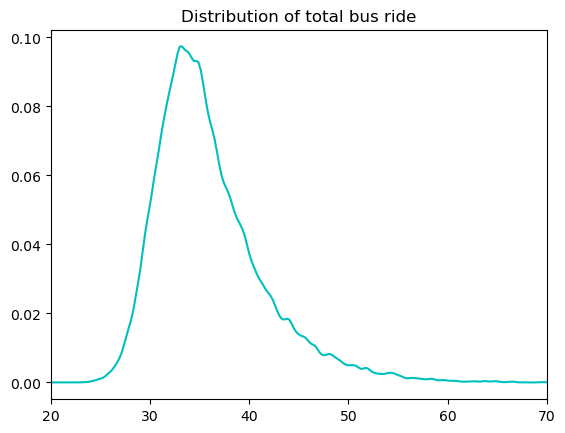

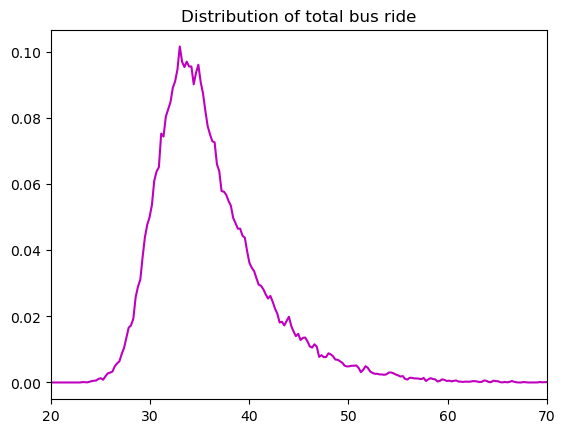

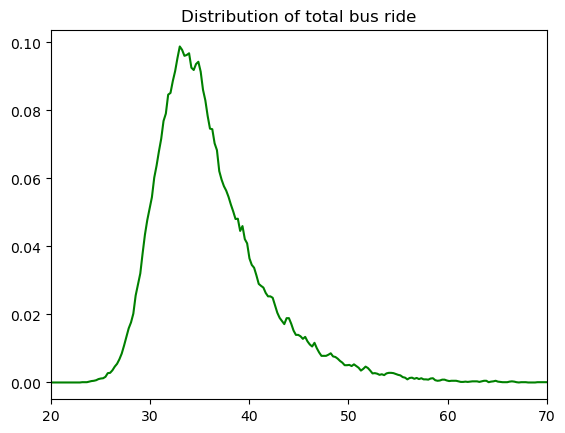

In [68]:
plt.plot(x,1/((R+1)*h)*Kernel_fun_g,color = 'c')
plt.title('Distribution of total bus ride')
plt.xlim([20,70])
plt.show()

plt.plot(x,1/((R+1)*h)*Kernel_fun_t,color = 'm')
plt.title('Distribution of total bus ride')
plt.xlim([20,70])
plt.show()

plt.plot(x,1/((R+1)*h)*Kernel_fun_r,color = 'g')
plt.title('Distribution of total bus ride')
plt.xlim([20,70])
plt.show()

In [69]:
#calculate probability
prob_g = integrate.cumtrapz(1/((R+1)*h)*Kernel_fun_g, x, initial=0)
prob_t = integrate.cumtrapz(1/((R+1)*h)*Kernel_fun_t, x, initial=0)
prob_r = integrate.cumtrapz(1/((R+1)*h)*Kernel_fun_r, x, initial=0)

index =  np.array(np.where(x <= 30))

print((prob_g[index.max()])*100,"%")
print((prob_t[index.max()])*100,"%")
print((prob_r[index.max()])*100,"%")

8.464167347635074 %
8.420958000351755 %
8.454008737690206 %


Using the histogram, the calculated probability is $8.55\%$, but using both the Gaussian and Triangular kernel density functions, we have probabilities that are smaller (on the order of $0.1\%$).  While all kernels give a similar overall shape, the Gaussian kernel appears to produce a curve that is much smoother than the Triangular and Rectangular kernels.  This comes from the smoothness of the Gaussian kernel function, which does not have the cusp point at $x_i$ that the Triangular kernel has nor the sharp vertical components of the rectangular kernel.